In [1]:
# import nlp_utils
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import (
    LogisticRegression,
    RidgeClassifier,
    SGDClassifier,
    PassiveAggressiveClassifier,
    Perceptron,
)
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.neighbors import (
    KNeighborsClassifier,
    RadiusNeighborsClassifier,
    NearestCentroid,
)
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier,
    VotingClassifier,
)
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import *
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    BaggingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier
)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from tabulate import tabulate  # Import the tabulate library
from sklearn.neural_network import MLPClassifier

from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingClassifier
from tqdm import tqdm
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, LSTM, GRU, Embedding, SimpleRNN, Dropout


# Ignore all warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import *

In [2]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Install the Kaggle API
!pip install kaggle

# Create a Kaggle folder if it doesn't exist
!mkdir -p ~/.kaggle

In [4]:

# Copy the kaggle.json to the appropriate location
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"riwaj111111","key":"4f87d63a52c5d0f05857576ffd2abe2e"}'}

In [5]:

!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json  # Change permissions


In [6]:
!kaggle datasets download saurabhshahane/fake-news-classification -p /content/ --unzip


Dataset URL: https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification
License(s): Attribution 4.0 International (CC BY 4.0)
 98% 90.0M/92.1M [00:05<00:00, 21.4MB/s]
100% 92.1M/92.1M [00:05<00:00, 17.9MB/s]


In [7]:
data = pd.read_csv("/content/WELFake_Dataset.csv")

In [8]:
data.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [9]:
data.shape

(72134, 4)

In [10]:
pd.set_option("display.max_colwidth",-1)

ValueError: Value must be a nonnegative integer or None

In [11]:
data.title

,title
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,NaN
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,SATAN 2: Russia unvelis an image of its terrif...
...,...
72129,Russians steal research on Trump in hack of U....
72130,WATCH: Giuliani Demands That Democrats Apolog...
72131,Migrants Refuse To Leave Train At Refugee Camp...
72132,Trump tussle gives unpopular Mexican leader mu...


In [12]:
data.label.value_counts()

,count
label,
1,37106
0,35028


In [13]:
data.isnull().sum()

,0
Unnamed: 0,0
title,558
text,39
label,0


In [14]:
data.dropna(inplace = True)

In [15]:
data.reset_index(inplace = True
                 )

In [16]:
data

,index,Unnamed: 0,title,text,label
0,0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
2,3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
3,4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
4,5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
...,...,...,...,...,...
71532,72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
71533,72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
71534,72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
71535,72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [17]:
data.drop(['Unnamed: 0'],
          axis =1, inplace = True)

In [18]:
import re
import string

# Text Cleaning

In [19]:
# Remove all non-ascii characters
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7F]+', ' ', x)

# Remove all numbers with letters attached to them
alphanumeric = lambda x: re.sub(r'\w*\d\w*', ' ', x)

# Convert all strings to lowercase
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# Remove extra whitespaces
extra_whitespace = lambda x: re.sub(' +', ' ', x)

data['text'] = data['text'].map(remove_non_ascii).map(alphanumeric).map(punc_lower).map(extra_whitespace)

In [20]:
data['text']

,text
0,no comment is expected from barack obama membe...
1,now most of the demonstrators gathered last n...
2,a dozen politically active pastors came here f...
3,the rs sarmat missile dubbed satan will replac...
4,all we can say on this one is it s about time ...
...,...
71532,washington reuters hackers believed to be work...
71533,you know because in fantasyland republicans ne...
71534,migrants refuse to leave train at refugee camp...
71535,mexico city reuters donald trump s combative s...


# Removing stopwords and stemming the text

In [21]:
Y = data.label

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(
    data.text, Y, test_size=0.2, random_state=42
)

# TFIDF Vectorizer

In [23]:
tfidf_vect = TfidfVectorizer(analyzer='word', stop_words='english', ngram_range=(1,2))
X_train_tfidf =  tfidf_vect.fit_transform(X_train)
X_test_tfidf =  tfidf_vect.transform(X_test)

In [24]:
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(57229, 6580978)
(14308, 6580978)


In [25]:
print(X_train_tfidf)

  (0, 5692407)	0.02941359729410264
  (0, 4249303)	0.02012939990373547
  (0, 3146725)	0.021405324931361873
  (0, 3287997)	0.017427864388712463
  (0, 1660212)	0.04107065806036784
  (0, 1586040)	0.02961949302225923
  (0, 3483662)	0.014196494501295669
  (0, 224980)	0.03281651496032919
  (0, 2491460)	0.019105231649442667
  (0, 4131632)	0.04240238729493937
  (0, 3311986)	0.038400518278305644
  (0, 1673505)	0.025409856721812226
  (0, 3649393)	0.04629986085166055
  (0, 148145)	0.051334178856908844
  (0, 1538923)	0.030401606058316346
  (0, 5087417)	0.025294958977955438
  (0, 5473570)	0.03893731246932272
  (0, 5960688)	0.16741664188515126
  (0, 1739624)	0.07509258035127953
  (0, 6047994)	0.12317855474110735
  (0, 3806997)	0.04584308603486685
  (0, 291203)	0.022944490553475503
  (0, 886010)	0.06958933437793065
  (0, 4150920)	0.06009583058632752
  (0, 6400877)	0.025712938614038103
  :	:
  (57228, 953141)	0.07175427282033396
  (57228, 2563029)	0.07175427282033396
  (57228, 5212506)	0.07175427282033

In [26]:

def evaluate_model(model, x_train, y_train, x_test, y_test):
    pipe = Pipeline([
        ('model', model),
    ])

    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)

    # Use appropriate classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, cm


# Initialize different classification models
models = {
    'Logistic Regression': LogisticRegression(),
    # 'Random Forest Classifier': RandomForestClassifier(),
    # 'Gradient Boosting Classifier': GradientBoostingClassifier(),
    # 'AdaBoost Classifier': AdaBoostClassifier(),
    # 'Bagging Classifier': BaggingClassifier(),
    # 'Extra Trees Classifier': ExtraTreesClassifier(),
    # 'Support Vector Classifier': SVC(),
    # 'K-Nearest Neighbors': KNeighborsClassifier(),
    # 'Decision Tree Classifier': DecisionTreeClassifier(),
    # 'Naive Bayes': GaussianNB(),
    # 'HistGradientBoosting Classifier': HistGradientBoostingClassifier(),
    # 'SGD Classifier': SGDClassifier(),
    # 'Passive Aggressive Classifier': PassiveAggressiveClassifier(),
    # 'Ridge Classifier': RidgeClassifier(),
    # 'MLP Neural Network': MLPClassifier(hidden_layer_sizes=(10,), max_iter=100),
}

# Create a list to store the results
results = []

# Evaluate and print classification metrics for different models
for model_name, model in tqdm(models.items()):
    accuracy, precision, recall, f1, cm = evaluate_model(model, X_train_tfidf, Y_train, X_test_tfidf, Y_test)
    results.append([model_name, accuracy, precision, recall, f1, cm])

# Print the results in a tabular form
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Confusion Matrix"]
print(tabulate(results, headers, tablefmt="grid"))

# Find the model with the highest accuracy
max_accuracy_index = np.argmax([result[1] for result in results])
best_model_name = results[max_accuracy_index][0]
best_model_cm = results[max_accuracy_index][5]  # Get the confusion matrix for the best model

print(f"\nThe model with the highest accuracy is: {best_model_name} (Accuracy: {results[max_accuracy_index][1]:.4f})")

# Only print the confusion matrix for the best model
print("\nConfusion Matrix for the Best Model:")
print(best_model_cm)

100%|██████████| 1/1 [00:40<00:00, 40.93s/it]

+---------------------+------------+-------------+----------+------------+--------------------+
| Model               |   Accuracy |   Precision |   Recall |   F1 Score | Confusion Matrix   |
+=====================+============+=============+==========+============+====================+
| Logistic Regression |   0.943738 |    0.943811 | 0.943683 |   0.943725 | [[6644  437]       |
|                     |            |             |          |            |  [ 368 6859]]      |
+---------------------+------------+-------------+----------+------------+--------------------+

The model with the highest accuracy is: Logistic Regression (Accuracy: 0.9437)

Confusion Matrix for the Best Model:
[[6644  437]
 [ 368 6859]]


NameError: name 'class_labels' is not defined

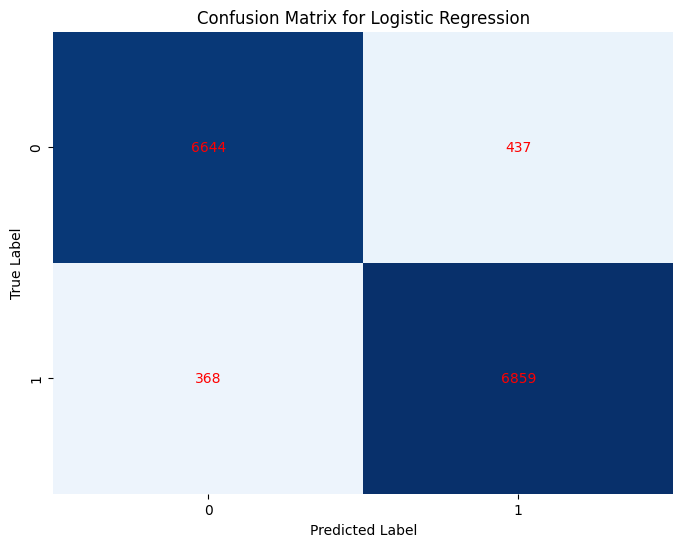

In [28]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(best_model_cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            vmin=0, vmax=best_model_cm.diagonal().max() + 10, annot_kws={"color": "red"})
plt.title(f"Confusion Matrix for {best_model_name}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(np.arange(len(class_labels)) + 0.5, ['no', 'yes'])
plt.yticks(np.arange(len(class_labels)) + 0.5, ['no', 'yes'])
plt.show()



# Testing

In [35]:
import random
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Define the pipeline with the vectorizer and the model
vectorizer = TfidfVectorizer(stop_words='english')
model = LogisticRegression()

# Fit the model (replace with your training data)
pipe = Pipeline([
    ('vectorizer', vectorizer),
    ('model', model)
])

# Assuming X_train, Y_train are already defined
pipe.fit(X_train, Y_train)

# Get predictions on the test dataset (replace with actual test data)
y_pred = pipe.predict(X_test)

# Check random predictions and compare with true labels
def check_random_predictions(X_test, y_test, y_pred, num_samples=5):
    # Ensure the test data has continuous integer indices
    random_indices = random.sample(range(len(X_test)), num_samples)

    print(f"\nChecking {num_samples} random predictions:\n")

    for idx in random_indices:
        # Access the elements safely using .iloc[] if the dataset is a DataFrame
        true_label = y_test.iloc[idx] if isinstance(y_test, pd.Series) else y_test[idx]
        predicted_label = y_pred[idx]
        text_sample = X_test.iloc[idx] if isinstance(X_test, pd.Series) else X_test[idx]

        # Print the random sample, its true label, and predicted label
        print(f"Text Sample: {text_sample}")
        print(f"True Label: {true_label}")
        print(f"Predicted Label: {predicted_label}")
        print("-" * 50)

# Call the function to check 5 random samples
check_random_predictions(X_test, Y_test, y_pred, num_samples=5)



Checking 5 random predictions:

Text Sample: republican congressional investigators expect a potential smoking gun establishing that the obama administration spied on the trump transition team and possibly the president elect himself will be produced to the house intelligence committee this week a source told fox news classified intelligence showing incidental collection of trump team communications purportedly seen by committee chairman devin nunes r calif and described by him in vague terms at a bombshell wednesday afternoon news conference came from multiple sources capitol hill sources told fox news the intelligence corroborated information about surveillance of the trump team that was known to nunes sources said even before president trump accused his predecessor of having wiretapped him in a series of now infamous tweets posted on march what i ve read bothers me and i think it should bother the president himself and his team because i think some of it seems to be inappropriate i

# GUI Implementation

In [36]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 116.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 13.0 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [37]:
import gradio as gr
import random
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
model = LogisticRegression()

# Define the pipeline with the vectorizer and the model
pipe = Pipeline([
    ('vectorizer', vectorizer),
    ('model', model)
])

# Fit the model
pipe.fit(X_train, Y_train)

# Get predictions on the test dataset
y_pred = pipe.predict(X_test)

# Check random predictions and compare with true labels
def check_random_predictions(X_test, y_test, y_pred, num_samples=5):
    random_indices = random.sample(range(len(X_test)), num_samples)

    random_predictions = []

    for idx in random_indices:
        true_label = y_test[idx]
        predicted_label = y_pred[idx]
        text_sample = X_test[idx]
        random_predictions.append({
            "Text Sample": text_sample,
            "True Label": true_label,
            "Predicted Label": predicted_label
        })

    return random_predictions

# Define the Gradio interface function
def gradio_predict(text_input):
    # Make a prediction for the user input
    prediction = pipe.predict([text_input])[0]

    # Show random test predictions along with true and predicted labels
    random_predictions = check_random_predictions(X_test, Y_test, y_pred, num_samples=3)

    # Return the output: user input, prediction, and random examples
    output_text = f"Your input text is classified as: {prediction}\n\n"
    output_text += "Here are some random predictions from the test set:\n"

    for example in random_predictions:
        output_text += f"\nText Sample: {example['Text Sample']}\n"
        output_text += f"True Label: {example['True Label']}\n"
        output_text += f"Predicted Label: {example['Predicted Label']}\n"
        output_text += "-" * 50 + "\n"

    return output_text

# Create the Gradio interface
interface = gr.Interface(
    fn=gradio_predict,
    inputs=gr.Textbox(label="Enter News Text", placeholder="Type your news text here..."),
    outputs=gr.Textbox(label="Prediction and Test Results", lines=10),
    title="News Text Classification",
    description="Enter a news text and get its classification as 'yes' (real) or 'no' (fake). See random predictions from the test dataset."
)

# Launch the interface
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a33991f1660bbb3d01.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
